In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [333]:
df = pd.read_csv('final_final.csv')

df.head()

BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

         PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000.0     2   2.000000        1400.0   
1  195000000.0     7  10.000000       17545.0   
2     260000.0     4   2.000000        2015.0   
3      69000.0     3   1.000000         445.0   
4   55000000.0     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                                   620 Sinclair Ave  Staten Island, NY 10312   
3                            2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                        5 E 64th St       New York, NY 10065   

                                        MAIN_ADDRESS  \
0             2 E 55th St Unit 803New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...   
2            620 Sinclair AveStaten Island, NY 10312   
3         2 E 55th St Unit 908W33Manhattan, NY 10022   
4                      5 E 64th StNew York, NY 10065   

  ADMINISTRATIVE_AREA_LEVEL_2  ...  LONGITUDE  \
0             New York County  ... -73.974483   
1               United States  ... -73.980991   
2               United States  ... -74.196109   
3               United States  ... -73.974613   
4               United States  ... -73.969856   

                                      SUBWAY_STATION      DISTANCE  \
0       6th Avenue & 56th Street at Southeast Corner    361.441253   
1       6th Avenue & 57th Street at Southwest Corner    384.829887   
2                            Bay Parkway & 66 Street  19771.588467   
3       6th Avenue & 56th Street at Southeast Corner    342.844227   
4  East 68th Street & Lexington Avenue at Southwe...    468.400358   

  KINDERGARTEN SCHOOL  COLLEGE  CAFE  BAR  PARKING  SUPERMARKET  
0            6     42        6   353  122       57           54  
1            3     41        4   327  120       44           46  
2            1      0        0     3    1        0            2  
3            6     41        6   355  122       57           54  
4            2     47        4   318  114       44           57  

[5 rows x 26 columns]

In [334]:
df.shape

(4801, 26)

In [336]:
df['ZIP_CODE'] = df['STATE'].str.extract(r'(\b\d{5}\b)')

Удаляем ненужные столбцы, всю нужную информацию о местоположении мы возьмем из координат

In [337]:
data = df.drop(columns=['BROKERTITLE', 'ADDRESS', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'FORMATTED_ADDRESS', 'STATE'])

In [338]:
data.head()

TYPE        PRICE  BEDS       BATH  PROPERTYSQFT  LOCALITY  \
0      Condo for sale     315000.0     2   2.000000        1400.0  New York   
1      Condo for sale  195000000.0     7  10.000000       17545.0  New York   
2      House for sale     260000.0     4   2.000000        2015.0  New York   
3      Condo for sale      69000.0     3   1.000000         445.0  New York   
4  Townhouse for sale   55000000.0     7   2.373861       14175.0  New York   

       SUBLOCALITY       STREET_NAME         LONG_NAME   LATITUDE  ...  \
0        Manhattan  East 55th Street   Regis Residence  40.761255  ...   
1  New York County          New York  West 57th Street  40.766393  ...   
2  Richmond County     Staten Island   Sinclair Avenue  40.541805  ...   
3  New York County          New York  East 55th Street  40.761398  ...   
4  New York County          New York  East 64th Street  40.767224  ...   

                                      SUBWAY_STATION      DISTANCE  \
0       6th Avenue & 56th Street at Southeast Corner    361.441253   
1       6th Avenue & 57th Street at Southwest Corner    384.829887   
2                            Bay Parkway & 66 Street  19771.588467   
3       6th Avenue & 56th Street at Southeast Corner    342.844227   
4  East 68th Street & Lexington Avenue at Southwe...    468.400358   

   KINDERGARTEN  SCHOOL  COLLEGE  CAFE  BAR  PARKING  SUPERMARKET  ZIP_CODE  
0             6      42        6   353  122       57           54     10022  
1             3      41        4   327  120       44           46     10019  
2             1       0        0     3    1        0            2     10312  
3             6      41        6   355  122       57           54     10022  
4             2      47        4   318  114       44           57     10065  

[5 rows x 21 columns]

In [339]:
data.isnull().sum()

TYPE              0
PRICE             0
BEDS              0
BATH              0
PROPERTYSQFT      0
LOCALITY          0
SUBLOCALITY       0
STREET_NAME       0
LONG_NAME         0
LATITUDE          0
LONGITUDE         0
SUBWAY_STATION    0
DISTANCE          0
KINDERGARTEN      0
SCHOOL            0
COLLEGE           0
CAFE              0
BAR               0
PARKING           0
SUPERMARKET       0
ZIP_CODE          0
dtype: int64

In [340]:
data.duplicated().sum()

np.int64(215)

In [341]:
data.drop_duplicates(inplace=True)

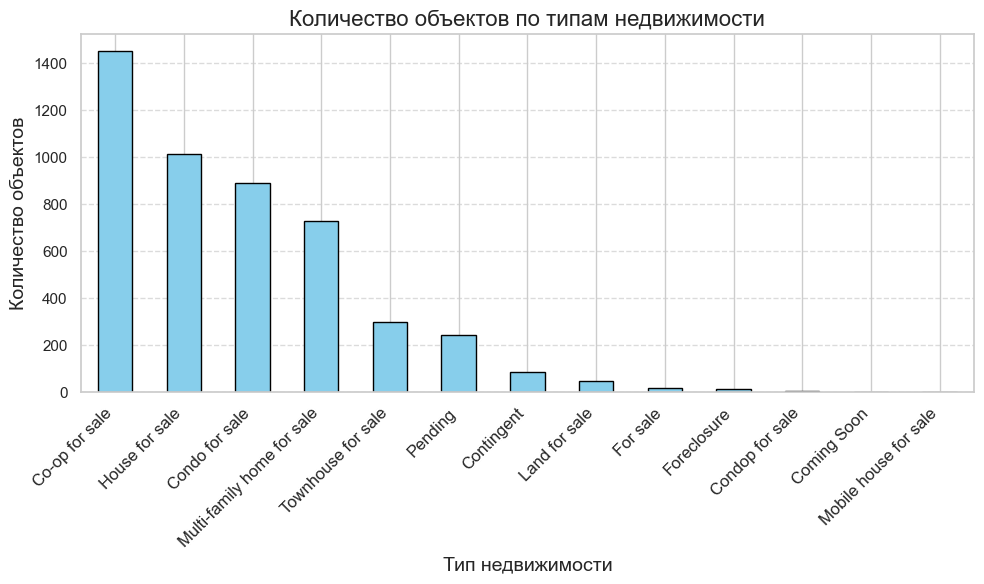

TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64


In [342]:
type_counts = df['TYPE'].value_counts()
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Количество объектов по типам недвижимости', fontsize=16)
plt.xlabel('Тип недвижимости', fontsize=14)
plt.ylabel('Количество объектов', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Показать график
plt.show()
print(type_counts)

### Расшифровка значений столбца `TYPE`

1. **Co-op for sale (Кооператив на продажу)** – 1450:
   - Кооперативные квартиры. Приобретая такое жилье, покупатель становится акционером в кооперативе, а не владельцем конкретной квартиры. Обычно это доступное жилье с определенными правилами для жильцов.

2. **House for sale (Дом на продажу)** – 1012:
   - Индивидуальные дома, включая одно- или многоквартирные здания, предлагаемые для покупки.

3. **Condo for sale (Кондоминиум на продажу)** – 891:
   - Квартиры в многоквартирных домах, где покупатель становится владельцем конкретной квартиры и имеет общую долю в общей собственности (коридоры, лифты, крыша и т.д.).

4. **Multi-family home for sale (Многоквартирный дом на продажу)** – 727:
   - Жилые здания, предназначенные для проживания нескольких семей, например, дуплексы или дома с несколькими квартирами.

5. **Townhouse for sale (Таунхаус на продажу)** – 299:
   - Частные дома, обычно с общими стенами с соседними домами, но с отдельным входом. Чаще встречаются в пригородах.

6. **Pending (В ожидании)** – 243:
   - Объекты недвижимости, которые уже находятся на стадии оформления сделки, но пока не проданы.

7. **Contingent (С условием)** – 88:
   - Недвижимость, сделка по которой зависит от выполнения определенных условий, например, одобрения ипотеки или проверки собственности.

8. **Land for sale (Земельный участок на продажу)** – 49:
   - Участки земли, предназначенные для строительства или других нужд, выставленные на продажу.

9. **For sale (На продажу)** – 20:
   - Общая категория, означающая, что объект недвижимости выставлен на продажу, без уточнения типа.

10. **Foreclosure (Ипотечное изъятие)** – 14:
    - Объекты, выставленные на продажу банком или кредитором после того, как предыдущий владелец не смог оплатить ипотеку.

11. **Condop for sale (Кондоп на продажу)** – 5:
    - Гибридный тип недвижимости, объединяющий черты кооперативов и кондоминиумов. Обычно менее строгие правила владения.

12. **Coming Soon (Скоро в продаже)** – 2:
    - Недвижимость, которая пока не доступна для покупки, но вскоре будет выставлена на продажу.

13. **Mobile house for sale (Мобильный дом на продажу)** – 1:
    - Мобильные дома, которые можно перевозить, обычно расположены на арендуемых участках.

---

### Анализ
- **Часто встречающиеся категории**: 
  - "Co-op for sale", "House for sale" и "Condo for sale" показывают, что рынок в основном сосредоточен на продаже стандартных жилых помещений.
- **Редкие категории**: 
  - "Coming Soon" и "Mobile house for sale" могут указывать на нишевые или уникальные предложения.
- **Пропуски**: 
  - "For sale" - очевидно пропуски, избавимся от них

In [343]:
data['TYPE'] = data['TYPE'].str.replace(r' for sale', '', regex=True)

data = data.query("TYPE != 'For sale'")

In [344]:
statistics = data.groupby('TYPE')['PRICE'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
statistics['mean'] = statistics['mean'].apply(lambda x: f"{x:,.2f}")
statistics['std'] = statistics['std'].apply(lambda x: f"{x:,.2f}")

print("Статистика по типам недвижимости:")
print(statistics)

Статистика по типам недвижимости:
                           mean     median            std        min  \
TYPE                                                                   
Co-op              1,114,128.02   425000.0   3,318,856.61    49500.0   
Coming Soon        1,172,000.00  1172000.0     739,633.69   649000.0   
Condo              2,615,780.14   880000.0   7,936,656.88    60000.0   
Condop               967,000.00  1072500.0     247,317.61   598000.0   
Contingent           888,693.17   689900.0   1,372,618.43   193999.0   
Foreclosure        1,343,010.36   592450.0   2,518,298.34   249900.0   
House              3,786,543.99   858500.0  69,131,290.81   130000.0   
Land               1,104,854.21   675000.0   1,228,678.69     5800.0   
Mobile house       1,288,000.00  1288000.0            nan  1288000.0   
Multi-family home  1,666,781.00  1199000.0   2,437,477.49   250000.0   
Pending            1,362,436.00   825000.0   2,774,105.20    90000.0   
Townhouse          6,406,234.1

### Анализ статистики по типам недвижимости

#### 1. **Co-op**
- Кооперативные квартиры имеют широкий диапазон цен с высокой средней ценой, но низкой медианой, что указывает на наличие как дешевых, так и дорогих объектов. Высокое стандартное отклонение говорит о сильном разбросе цен, включая дорогие предложения.

#### 2. **Coming Soon**
- Данные о недвижимости, которая будет выставлена на продажу, представлены крайне ограниченно (только 2 записи), что делает этот тип ненадежным для анализа.

#### 3. **Condo**
- Кондиоминиумы имеют высокую среднюю цену, однако медиана гораздо ниже, что указывает на большое количество доступных вариантов по более низким ценам, с несколькими дорогими объектами, увеличивающими среднее значение.

#### 4. **Condop**
- Этот тип недвижимости характеризуется относительно стабильной ценой с высокой медианой, что указывает на меньшее количество дорогих объектов в сравнении с другими типами, такими как квартиры.

#### 5. **Contingent**
- Недвижимость с условием контингента имеет относительно низкую медиану и высокий разброс цен, что может свидетельствовать о наличии как доступных, так и дорогих объектов, которые еще не проданы.

#### 6. **Foreclosure**
- Недвижимость, продающаяся в рамках ипотечного изъятия, демонстрирует большой разброс цен, с минимальными ценами около 250,000 и редкими дорогими объектами. Это может быть связано с попыткой продажи недорогих объектов с большими скидками.

#### 7. **House**
- Дома показывают широкий разброс цен с высокой медианой, что свидетельствует о значительном количестве объектов с ценами как ниже, так и выше средней. Также, возможное влияние аномальных цен на очень дорогие дома.

#### 8. **Land**
- Земельные участки имеют низкие цены и маленький диапазон, что подтверждается более низкими минимальными и максимальными значениями.

#### 9. **Mobile house**
- Мобильные дома продаются по фиксированной цене, с очень ограниченным количеством объектов. Данный тип представлен только одним объектом.

#### 10. **Multi-family home**
- Многоквартирные дома имеют высокие средние цены, но их медиана заметно ниже, что указывает на то, что большинство объектов стоит дешевле, чем несколько самых дорогих.

#### 11. **Pending**
- Недвижимость с состоянием "в ожидании" имеет значительный разброс цен, но в целом она находится в пределах нормальных цен для домов, с некоторыми дешевыми объектами.

#### 12. **Townhouse**
- Таунхаусы имеют очень высокие средние цены с заметным разбросом, что может указывать на большое количество дорогих объектов, влияющих на среднее значение.
---
На основе анализа статистики можно избавиться от следующих типов недвижимости:

1. **Coming Soon**
   - Очень ограниченное количество данных (только 2 записи). Это делает тип ненадежным для анализа, и удаление этих строк не повлияет на точность анализа.

2. **Mobile house**
   - Мобильные дома представлены только одним объектом, что делает статистику по этому типу крайне ограниченной. Удаление этого типа также не повлияет на общий анализ.

3. **Condop**
   - Хотя количество объектов невелико (5 записей), данный тип недвижимости может быть исключен, чтобы избежать сильного искажения статистики. В случае анализа большого набора данных, удаление этого типа будет оправдано.

4. **Foreclosure**
   - Несмотря на наличие 14 объектов, данный тип недвижимости может быть исключен из-за большого разброса цен и специфики (ипотечное изъятие). Foreclosure обычно имеет заниженную стоимость, что может значительно искажать результаты анализа рынка.

Удаление этих типов данных поможет улучшить качество анализа, исключив редкие и специфичные случаи, которые могут вносить шум в результаты.


In [345]:
types_to_remove = ['Coming Soon', 'Mobile house', 'Condop', 'Foreclosure']

data = data[~data['TYPE'].isin(types_to_remove)]

print(data['TYPE'].value_counts())

TYPE
Co-op                1387
House                 966
Condo                 842
Multi-family home     699
Townhouse             288
Pending               229
Contingent             87
Land                   47
Name: count, dtype: int64


## Анализ числовых признаков

## В столбце BATH хранится не целое значение - избавимся от него

In [346]:
print(data['BATH'].value_counts())

BATH
2.000000     1578
1.000000     1444
4.000000      460
3.000000      441
2.373861      285
6.000000      132
5.000000       95
8.000000       43
7.000000       23
10.000000      16
9.000000        7
16.000000       5
20.000000       3
12.000000       3
11.000000       2
0.000000        2
32.000000       1
13.000000       1
50.000000       1
24.000000       1
43.000000       1
17.000000       1
Name: count, dtype: int64


In [347]:
data = data[(data['BATH'] == data['BATH'].astype(int))]

## Проверим скошенность

In [348]:
for column in data.select_dtypes(include=[np.number]).columns:
    skewness_per_column = data[column].skew()
    print(f"Скошенность для {column}: {skewness_per_column}")

Скошенность для PRICE: 63.42895440295892
Скошенность для BEDS: 5.584120017923471
Скошенность для BATH: 7.581704432906271
Скошенность для PROPERTYSQFT: 6.965821745330479
Скошенность для LATITUDE: -0.10722007986221879
Скошенность для LONGITUDE: -0.38408135069105165
Скошенность для DISTANCE: 2.718570457053032
Скошенность для KINDERGARTEN: 3.994652531876533
Скошенность для SCHOOL: 0.8801033939097942
Скошенность для COLLEGE: 2.1914311388738
Скошенность для CAFE: 1.6337283259535895
Скошенность для BAR: 2.4129476209453697
Скошенность для PARKING: 1.732215514293691
Скошенность для SUPERMARKET: 0.9622219140700256


Скошенность данных измеряет асимметрию распределения: положительная скошенность указывает на смещение в сторону меньших значений, а отрицательная — в сторону больших. Результаты скошенности для переменных PRICE (66.80), BEDS (5.45), BATH (7.76) и PROPERTYSQFT (12.80), LONGITUDE (-0.39) показывают, что данные сильно скошены, что свидетельствует о наличии серьезных выбросов, искажающих распределение. . В то время как для LATITUDE (-0.09) скошенность близка к нулю, что указывает на более сбалансированные распределения.

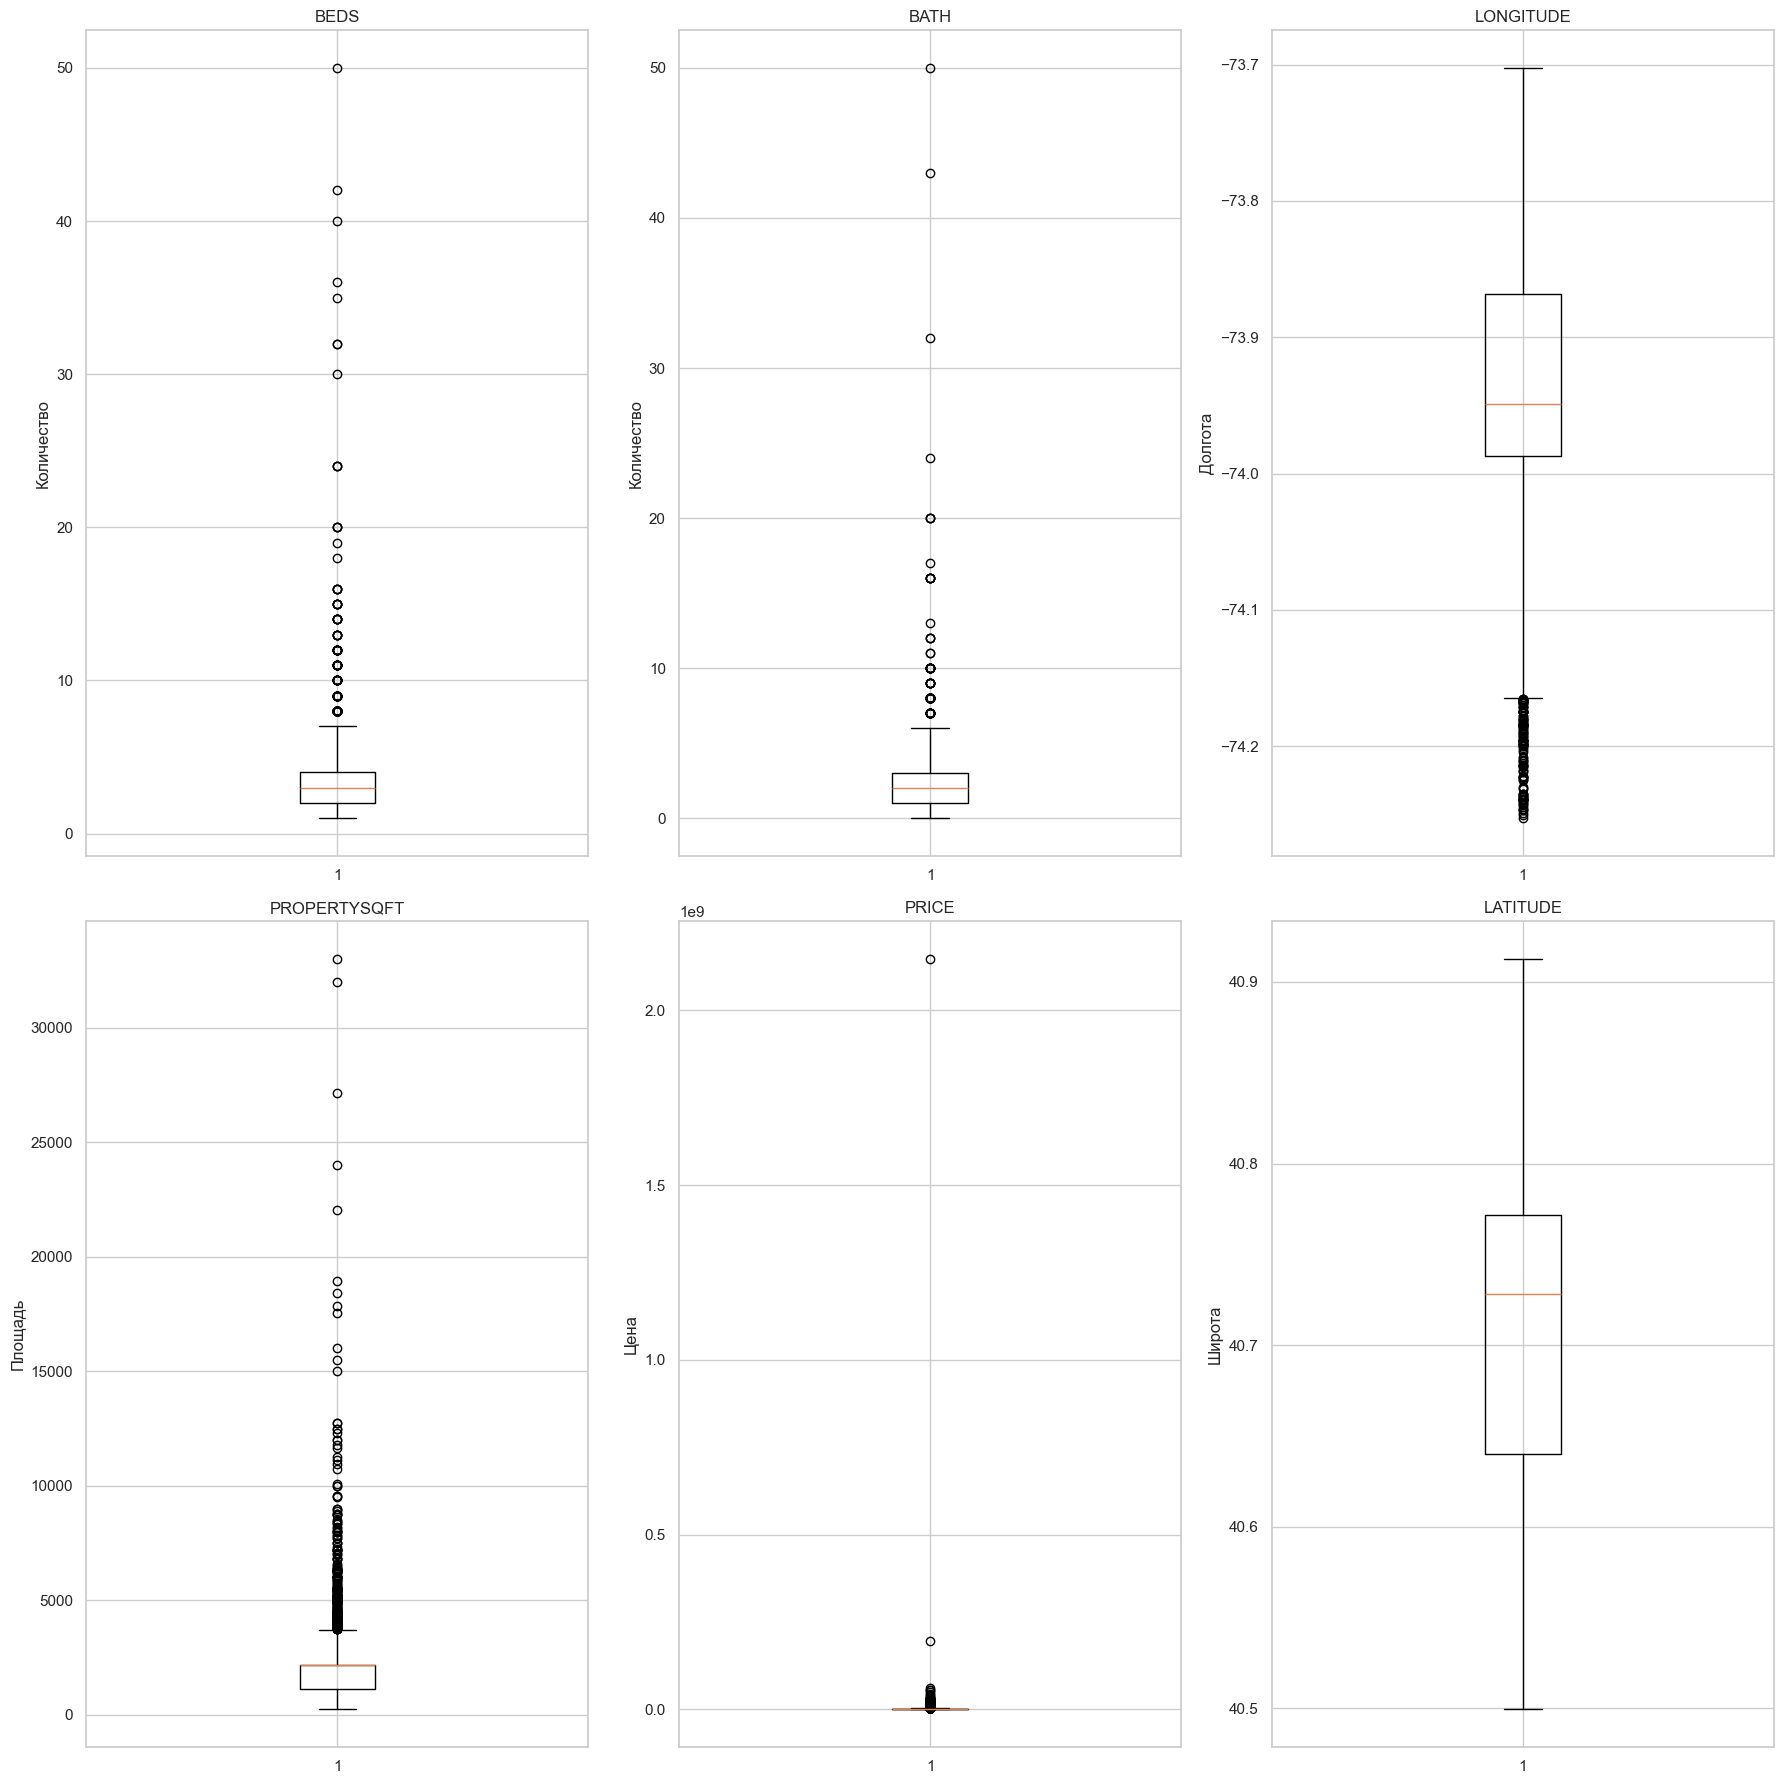

In [349]:
# Создаем фигуру с 3 строками и 2 столбцами
fig, axes = plt.subplots(2, 3, figsize=(18, 18))

# Boxplot для BEDS
axes[0, 0].boxplot(data['BEDS'])
axes[0, 0].set_ylabel('Количество')
axes[0, 0].set_title('BEDS')

# Boxplot для BATH
axes[0, 1].boxplot(data['BATH'])
axes[0, 1].set_ylabel('Количество')
axes[0, 1].set_title('BATH')

# Boxplot для PROPERTYSQFT
axes[1, 0].boxplot(data['PROPERTYSQFT'])
axes[1, 0].set_ylabel('Площадь')
axes[1, 0].set_title('PROPERTYSQFT')

# Boxplot для PRICE
axes[1, 1].boxplot(data['PRICE'])
axes[1, 1].set_ylabel('Цена')
axes[1, 1].set_title('PRICE')

# Boxplot для LONGITUDE
axes[0, 2].boxplot(data['LONGITUDE'])
axes[0, 2].set_ylabel('Долгота')
axes[0, 2].set_title('LONGITUDE')

# Boxplot для LATITUDE
axes[1, 2].boxplot(data['LATITUDE'])
axes[1, 2].set_ylabel('Широта')
axes[1, 2].set_title('LATITUDE')


# Показать графики
plt.tight_layout()
plt.show()


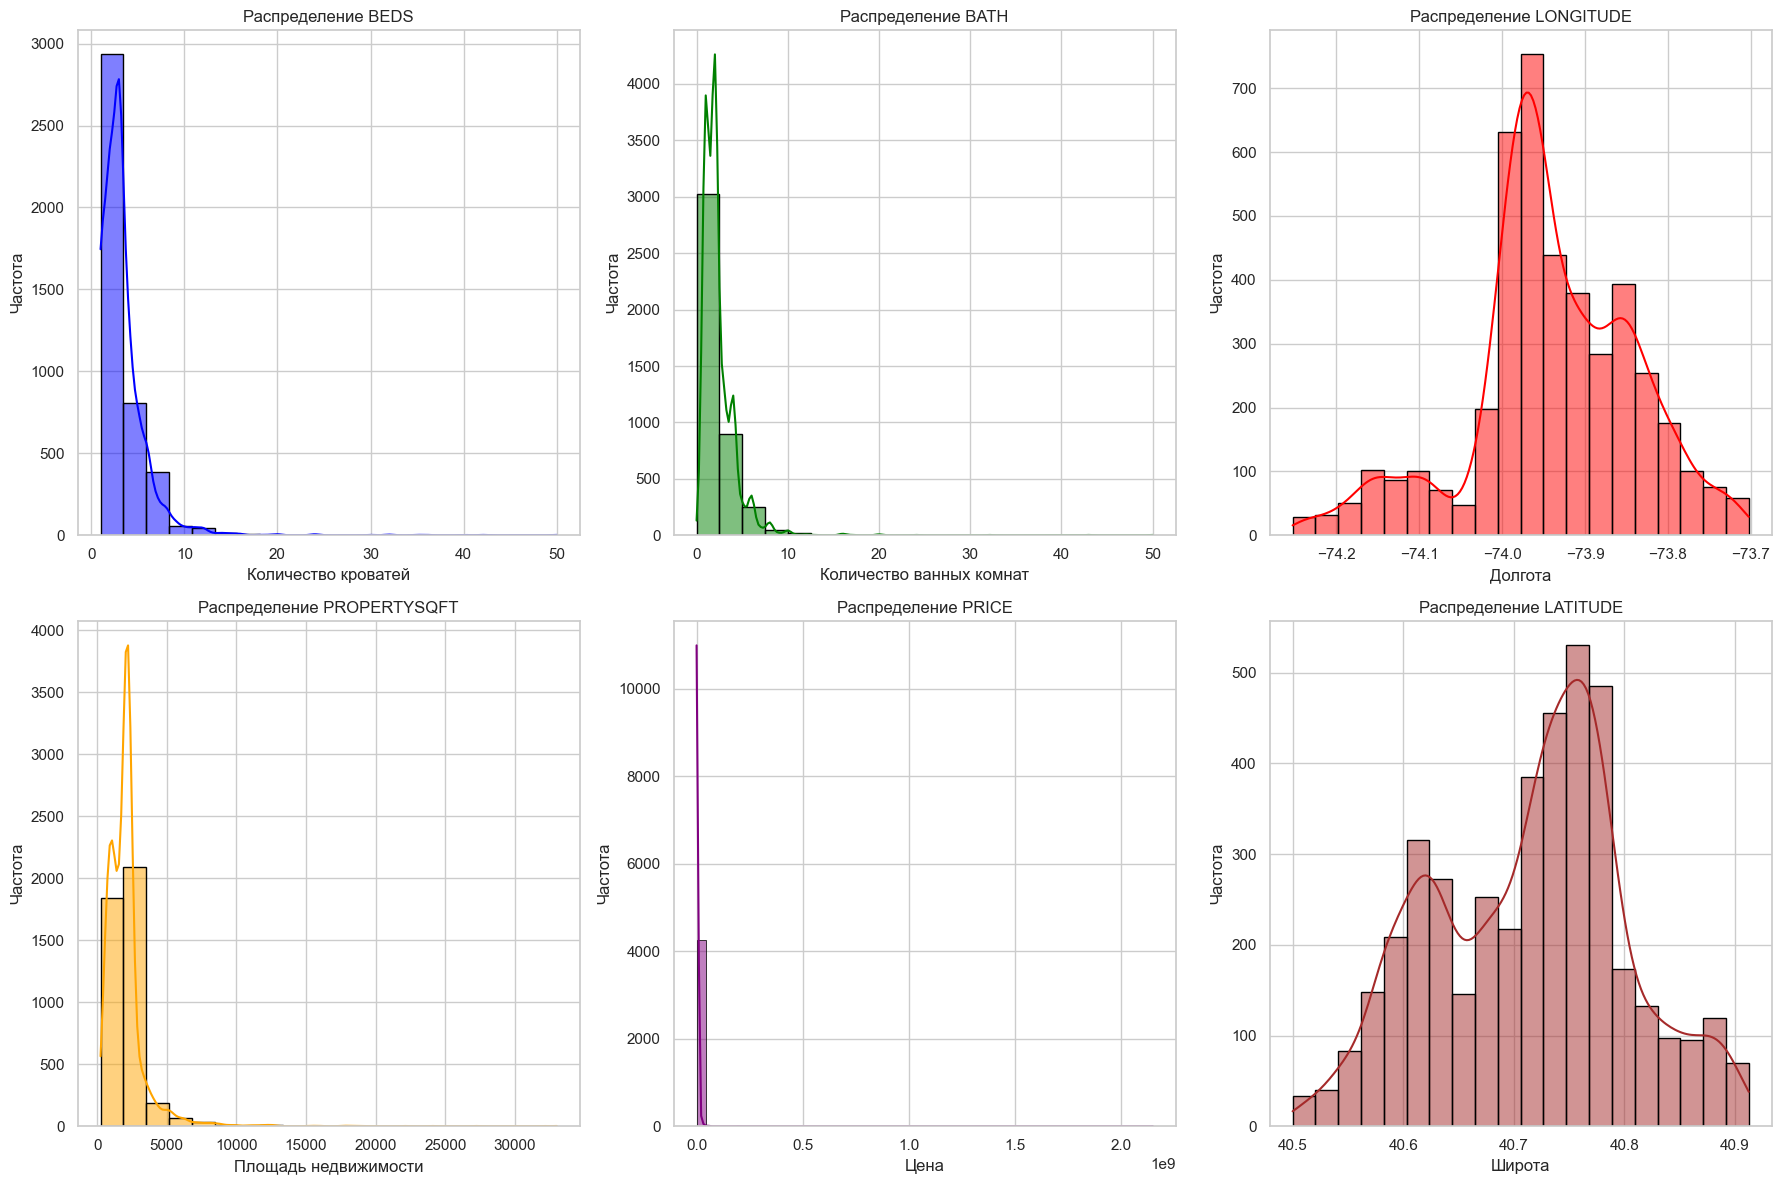

In [350]:
# Создаем фигуру с 2 строками и 3 столбцами
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Гистограмма для BEDS
sns.histplot(data['BEDS'], bins=20, kde=True, color='blue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_xlabel('Количество кроватей')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Распределение BEDS')

# Гистограмма для BATH
sns.histplot(data['BATH'], bins=20, kde=True, color='green', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_xlabel('Количество ванных комнат')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Распределение BATH')

# Гистограмма для PROPERTYSQFT
sns.histplot(data['PROPERTYSQFT'], bins=20, kde=True, color='orange', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_xlabel('Площадь недвижимости')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Распределение PROPERTYSQFT')

# Гистограмма для PRICE
sns.histplot(data['PRICE'], bins=50, kde=True, color='purple', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_xlabel('Цена')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title('Распределение PRICE')

# Гистограмма для LONGITUDE
sns.histplot(data['LONGITUDE'], bins=20, kde=True, color='red', edgecolor='black', ax=axes[0, 2])
axes[0, 2].set_xlabel('Долгота')
axes[0, 2].set_ylabel('Частота')
axes[0, 2].set_title('Распределение LONGITUDE')

# Гистограмма для LATITUDE
sns.histplot(data['LATITUDE'], bins=20, kde=True, color='brown', edgecolor='black', ax=axes[1, 2])
axes[1, 2].set_xlabel('Широта')
axes[1, 2].set_ylabel('Частота')
axes[1, 2].set_title('Распределение LATITUDE')

# Показать графики
plt.tight_layout()
plt.show()

### У нас есть выбросы от которых нужно избавиться 

In [352]:
filter_data=data.iloc[:,[1,2,3,4,9,10]]
filter_data

PRICE  BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE
0        315000.0     2   2.0   1400.000000  40.761255 -73.974483
1     195000000.0     7  10.0  17545.000000  40.766393 -73.980991
2        260000.0     4   2.0   2015.000000  40.541805 -74.196109
3         69000.0     3   1.0    445.000000  40.761398 -73.974613
5        690000.0     5   2.0   4004.000000  40.674363 -73.958725
...           ...   ...   ...           ...        ...        ...
4796     599000.0     1   1.0   2184.207862  40.774350 -73.955879
4797     245000.0     1   1.0   2184.207862  40.732538 -73.860152
4798    1275000.0     1   1.0   2184.207862  40.745882 -74.003398
4799     598125.0     2   1.0    655.000000  40.742770 -73.872752
4800     349000.0     1   1.0    750.000000  40.579147 -73.970949

[4260 rows x 6 columns]

In [353]:
for column in filter_data.columns:
    Q1 = filter_data[column].quantile(0.25)
    Q3 = filter_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = filter_data[(filter_data[column] >= lower_bound) & (filter_data[column] <= upper_bound)][column]
    
data.isna().sum()

TYPE                0
PRICE             493
BEDS              203
BATH              108
PROPERTYSQFT      288
LOCALITY            0
SUBLOCALITY         0
STREET_NAME         0
LONG_NAME           0
LATITUDE            0
LONGITUDE         124
SUBWAY_STATION      0
DISTANCE            0
KINDERGARTEN        0
SCHOOL              0
COLLEGE             0
CAFE                0
BAR                 0
PARKING             0
SUPERMARKET         0
ZIP_CODE            0
dtype: int64

Лучше удалим строки с пропускми в долготе

In [354]:
# Удалим строки с пропусками в столбце LONGITUDE
data = data.dropna(subset=['LONGITUDE'])

Заполним остальные пропуски методом ближайших соседей

In [355]:
# Создаем объект KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Выявляем числовые столбцы
columns_to_impute = data.select_dtypes(include=[np.number]).columns

columns_to_impute = [col for col in columns_to_impute if col != 'LONGITUDE']
data[columns_to_impute] = knn_imputer.fit_transform(data[columns_to_impute])

# Проверим, остались ли пропуски
print(data.isna().sum())


TYPE              0
PRICE             0
BEDS              0
BATH              0
PROPERTYSQFT      0
LOCALITY          0
SUBLOCALITY       0
STREET_NAME       0
LONG_NAME         0
LATITUDE          0
LONGITUDE         0
SUBWAY_STATION    0
DISTANCE          0
KINDERGARTEN      0
SCHOOL            0
COLLEGE           0
CAFE              0
BAR               0
PARKING           0
SUPERMARKET       0
ZIP_CODE          0
dtype: int64


In [356]:
data.duplicated().sum()

np.int64(0)

Посмотрим на распредления

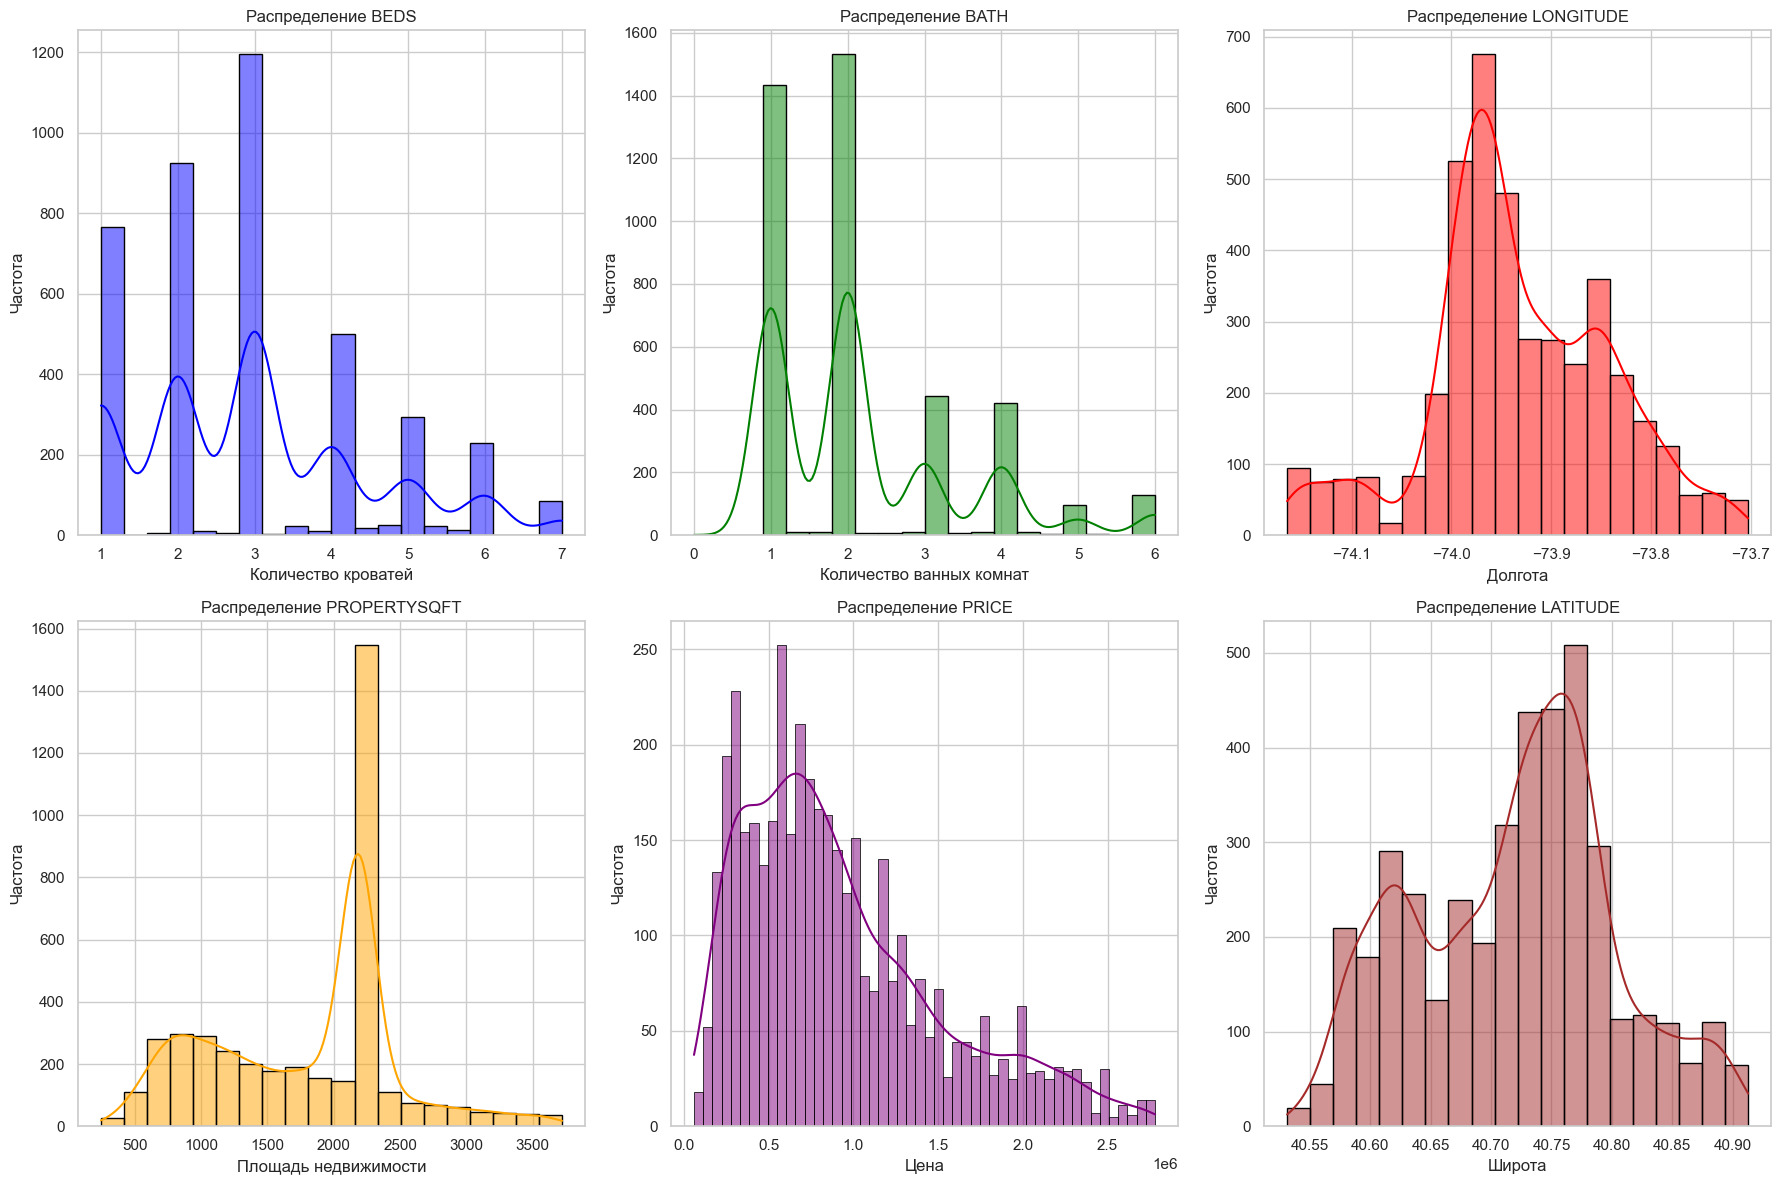

In [357]:
# Создаем фигуру с 2 строками и 3 столбцами
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Гистограмма для BEDS
sns.histplot(data['BEDS'], bins=20, kde=True, color='blue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_xlabel('Количество кроватей')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Распределение BEDS')

# Гистограмма для BATH
sns.histplot(data['BATH'], bins=20, kde=True, color='green', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_xlabel('Количество ванных комнат')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Распределение BATH')

# Гистограмма для PROPERTYSQFT
sns.histplot(data['PROPERTYSQFT'], bins=20, kde=True, color='orange', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_xlabel('Площадь недвижимости')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Распределение PROPERTYSQFT')

# Гистограмма для PRICE
sns.histplot(data['PRICE'], bins=50, kde=True, color='purple', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_xlabel('Цена')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title('Распределение PRICE')

# Гистограмма для LONGITUDE
sns.histplot(data['LONGITUDE'], bins=20, kde=True, color='red', edgecolor='black', ax=axes[0, 2])
axes[0, 2].set_xlabel('Долгота')
axes[0, 2].set_ylabel('Частота')
axes[0, 2].set_title('Распределение LONGITUDE')

# Гистограмма для LATITUDE
sns.histplot(data['LATITUDE'], bins=20, kde=True, color='brown', edgecolor='black', ax=axes[1, 2])
axes[1, 2].set_xlabel('Широта')
axes[1, 2].set_ylabel('Частота')
axes[1, 2].set_title('Распределение LATITUDE')

# Показать графики
plt.tight_layout()
plt.show()

## Мы обнаружили странные значения количества ванных и спальных комнат.

In [358]:
# Приводим столбцы BEDS и BATH к целым числам (округление)
data['BEDS'] = data['BEDS'].round().astype(int)
data['BATH'] = data['BATH'].round().astype(int)

In [359]:
# Фильтрация строк, где количество ванных комнат равно 0
bath_zero = data[data['BATH'] == 0]

# Вывод отфильтрованных данных
print(bath_zero)

           TYPE      PRICE  BEDS  BATH  PROPERTYSQFT         LOCALITY  \
2699    Pending   675000.0     3     0   2780.000000  New York County   
3379  Townhouse  1066800.0     3     0   2184.207862         New York   

          SUBLOCALITY STREET_NAME         LONG_NAME   LATITUDE  ...  \
2699         New York   Manhattan                41  40.714393  ...   
3379  New York County    New York  West 86th Street  40.786046  ...   

               SUBWAY_STATION    DISTANCE  KINDERGARTEN  SCHOOL  COLLEGE  \
2699  Greenwich St & Vesey St  319.033583           8.0    26.0      2.0   
3379       Broadway & 86th St  497.844489          16.0    42.0      0.0   

       CAFE    BAR  PARKING  SUPERMARKET  ZIP_CODE  
2699  286.0  152.0     10.0         58.0     10007  
3379  149.0   58.0     21.0         39.0     10024  

[2 rows x 21 columns]


In [360]:
# Выбираем только числовые столбцы
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Сохраняем оригинальные значения, где BATH == 0
bath_zero_indices = data[data['BATH'] == 0].index

# Создаем временную копию данных, чтобы избежать изменения исходного DataFrame
data_copy = data.copy()

# Заменяем 0 на NaN в числовых столбцах (включая BATH)
data_copy.loc[bath_zero_indices, 'BATH'] = np.nan  # Заменяем 0 на NaN только в BATH

# Применяем KNNImputer только к числовым столбцам
data_copy[numeric_columns] = knn_imputer.fit_transform(data_copy[numeric_columns])

# Восстанавливаем изначальные строки, где BATH был 0, с новыми значениями
data.loc[bath_zero_indices, 'BATH'] = data_copy.loc[bath_zero_indices, 'BATH']

data['BATH'] = data['BATH'].round().astype(int)

/var/folders/tk/yyvw73cn5pb00ymf5kkn6gn80000gn/T/ipykernel_80929/4238584970.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.4 2.8]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[bath_zero_indices, 'BATH'] = data_copy.loc[bath_zero_indices, 'BATH']


In [361]:
print(data['BATH'].value_counts())

BATH
2    1550
1    1444
3     466
4     441
6     130
5     105
Name: count, dtype: int64


## Проверим скошенность

In [362]:
for column in data.select_dtypes(include=[np.number]).columns:
    skewness_per_column = data[column].skew()
    print(f"Скошенность для {column}: {skewness_per_column}")

Скошенность для PRICE: 0.9821538259296794
Скошенность для BEDS: 0.6642592855010473
Скошенность для BATH: 1.2284369058012425
Скошенность для PROPERTYSQFT: -0.03594639427065773
Скошенность для LATITUDE: -0.015208190407984294
Скошенность для LONGITUDE: -0.06125007920819903
Скошенность для DISTANCE: 2.4985668811264956
Скошенность для KINDERGARTEN: 3.9335991520255194
Скошенность для SCHOOL: 0.853615034578807
Скошенность для COLLEGE: 2.1440349475921194
Скошенность для CAFE: 1.5916023778557042
Скошенность для BAR: 2.3677173109500793
Скошенность для PARKING: 1.6912968595030606
Скошенность для SUPERMARKET: 0.9336375602034337


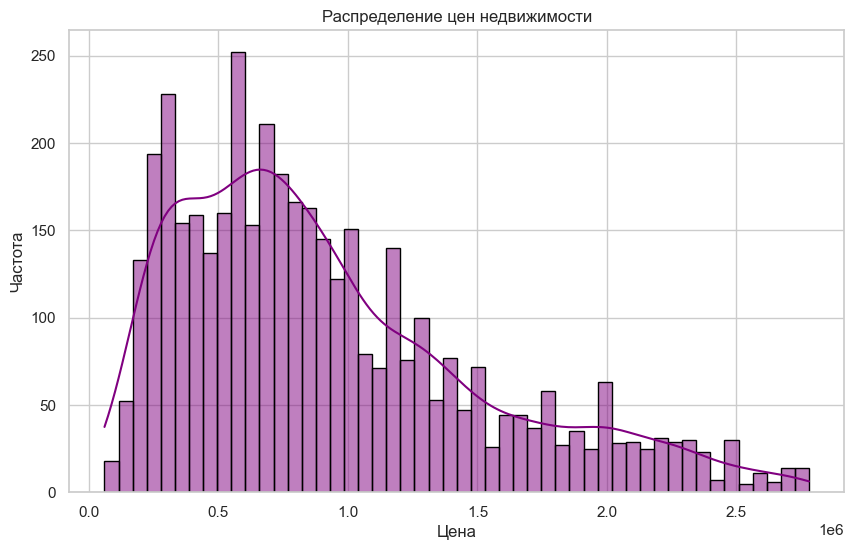

In [363]:
# Построение гистограммы распределения PRICE
plt.figure(figsize=(10, 6))
sns.histplot(data['PRICE'], bins=50, kde=True, color='purple', edgecolor='black')
plt.title('Распределение цен недвижимости')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

## Посмотрим на корреляцию между признаками

<Axes: title={'center': 'Pearson Correlation Matrix'}>

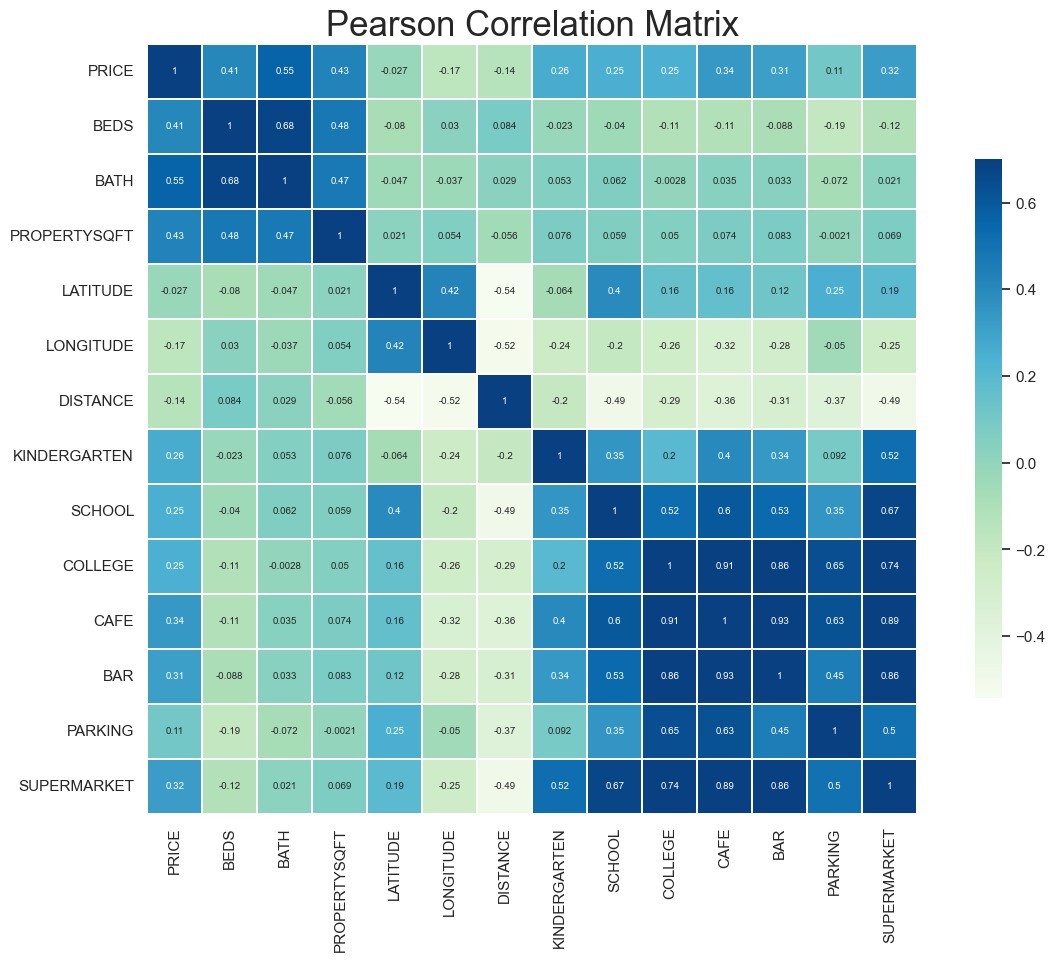

In [364]:
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

sns.set_theme(style="whitegrid", font_scale=1)
plt.figure(figsize=(15,10))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(data[numerical_columns].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [33]:
import folium
import osmnx as ox
from geopy.distance import geodesic

Визуализируем распределение объектов на карте

In [38]:
# Нормализуем цену для создания цветового градиента
price_min, price_max = data['PRICE'].min(), data['PRICE'].max()
map_center = [data['LATITUDE'].mean(), data['LONGITUDE'].mean()]

# Функция для интерполяции цвета
def price_to_color(price, cmap=plt.cm.viridis):
    norm_price = (price - price_min) / (price_max - price_min)  # Нормализация цены
    rgba_color = cmap(norm_price)  # Получаем RGBA из colormap
    return f'rgba({int(rgba_color[0]*255)}, {int(rgba_color[1]*255)}, {int(rgba_color[2]*255)}, {rgba_color[3]:.2f})'

# Создаем новую карту
nyc_map_gradient = folium.Map(location=map_center, zoom_start=12)

# Добавляем маркеры с градиентом цвета
for _, row in data.iterrows():
    folium.CircleMarker(
        location=(row['LATITUDE'], row['LONGITUDE']),
        radius=5,
        color=price_to_color(row['PRICE']),
        fill=True,
        fill_opacity=0.7,
        popup=f"Price: ${row['PRICE']:,.2f}",
    ).add_to(nyc_map_gradient)

In [40]:
nyc_map_gradient

Сделаем из геоданных дополнительные предикторы: для каждого объекта недвижимости добавим расстояние до близжайшего входа в метро, число продуктовых магазинов, ресторанов, образовательных учереждений, парковок

In [110]:
city = "New York City, New York, USA"
subway_entrance = ox.features_from_address(city, tags={"railway": "subway_entrance"}, dist=40000)

In [111]:
subway_entrance = subway_entrance[~subway_entrance['name'].isna()]

In [112]:
subway_entrance.head()

geometry level          railway  \
element id                                                             
node    274748567  POINT (-73.96749 40.68812)     0  subway_entrance   
        274749479  POINT (-73.96574 40.68847)     0  subway_entrance   
        274749567  POINT (-73.96559 40.68816)     0  subway_entrance   
        297886478  POINT (-74.04109 40.71925)     0  subway_entrance   
        348548369  POINT (-73.97798 40.76347)     0  subway_entrance   

                  wheelchair       description entrance highway access  \
element id                                                               
node    274748567         no               NaN      NaN     NaN    NaN   
        274749479         no               NaN      NaN     NaN    NaN   
        274749567         no               NaN      NaN     NaN    NaN   
        297886478        NaN               NaN      NaN     NaN    NaN   
        348548369         no  all F,<F> trains      NaN     NaN    NaN   

                  check_date:wheelchair bicycle  ... addr:street subway steps  \
element id                                       ...                            
node    274748567                   NaN     NaN  ...         NaN    NaN   NaN   
        274749479                   NaN     NaN  ...         NaN    NaN   NaN   
        274749567                   NaN     NaN  ...         NaN    NaN   NaN   
        297886478                   NaN     NaN  ...         NaN    NaN   NaN   
        348548369                   NaN     NaN  ...         NaN    NaN   NaN   

                   ref fixme addr:housenumber transit_direction route_ref  \
element id                                                                  
node    274748567  NaN   NaN              NaN               NaN         G   
        274749479  NaN   NaN              NaN               NaN         G   
        274749567  NaN   NaN              NaN               NaN         G   
        297886478  NaN   NaN              NaN               NaN       NaN   
        348548369  NaN   NaN              NaN               NaN       NaN   

                  barrier layer  
element id                       
node    274748567     NaN   NaN  
        274749479     NaN   NaN  
        274749567     NaN   NaN  
        297886478     NaN   NaN  
        348548369     NaN   NaN  

[5 rows x 38 columns]

In [168]:
map_center = [subway_entrance.geometry.y.mean(), subway_entrance.geometry.x.mean()]

# Создаем базовую карту
nyc_map = folium.Map(location=map_center, zoom_start=11)

# Добавляем точки входов в метро на карту
for point in subway_entrance.itertuples():
    folium.Marker(
        location=[point.geometry.y, point.geometry.x],
        popup=f"Subway Entrance: {point.name}",
        icon=folium.Icon(color="blue", icon="info-sign"),
    ).add_to(nyc_map)

nyc_map

In [158]:
subway_coords = [(point.name, (point.geometry.y, point.geometry.x)) for point in subway_entrance.itertuples()]
def find_closest_subway(object_coord, subway_coords):
    min_entrance = min(subway_coords, key=lambda coord: geodesic(object_coord, coord[1]).meters)
    return [min_entrance[0], geodesic(object_coord, min_entrance[1]).meters]

In [163]:
stations_and_distances_df = pd.DataFrame(columns=['subway_station', 'distance'])
for house_obj in df.itertuples():
    stations_and_distances_df.loc[len(stations_and_distances_df)] = find_closest_subway((house_obj.LATITUDE, house_obj.LONGITUDE), subway_coords)

In [273]:
df = pd.concat([df, stations_and_distances_df], axis=1)
df.head()

TYPE      PRICE  BEDS  BATH  PROPERTYSQFT         LOCALITY  \
0  Condo   315000.0   2.0   2.0   1400.000000         New York   
1  Condo  1930577.4   7.0   4.0   2352.366290         New York   
3  Condo    69000.0   3.0   1.0    445.000000         New York   
5  House   690000.0   5.0   2.0   2452.966290         New York   
6  Condo   899500.0   2.0   2.0   2184.207862  New York County   

       SUBLOCALITY       STREET_NAME         LONG_NAME   LATITUDE  LONGITUDE  \
0        Manhattan  East 55th Street   Regis Residence  40.761255 -73.974483   
1  New York County          New York  West 57th Street  40.766393 -73.980991   
3  New York County          New York  East 55th Street  40.761398 -73.974613   
5     Kings County          Brooklyn        Park Place  40.674363 -73.958725   
6         New York         Manhattan               157  40.809448 -73.946777   

   ZIP_CODE                                   subway_station    distance  
0   10022.0     6th Avenue & 56th Street at Southeast Corner  361.441253  
1   10019.0     6th Avenue & 57th Street at Southwest Corner  384.829887  
3   10022.0     6th Avenue & 56th Street at Southeast Corner  342.844227  
5   11238.0                Eastern Parkway - Brooklyn Museum  518.648971  
6   10027.0  Lenox Avenue & 125th Street at Northwest Corner  192.796697

Для каждой точки найдем число продуктовых магазинов, ресторанов, учебных заведений, парковок

In [245]:
tags={
    "amenity": ["kindergarten", "school", "college", "cafe", "bar", "parking"],
    "shop": "supermarket"
}
columns = ["kindergarten", "school", "college", "cafe", "bar", "parking", "supermarket"]

In [249]:
all_features = ox.features_from_address(city, tags=tags, dist=50000)

In [252]:
all_features = all_features.loc['node']

In [266]:
extra_features = pd.DataFrame(columns=columns)
extra_features

Empty DataFrame
Columns: [kindergarten, school, college, cafe, bar, parking, supermarket]
Index: []

In [267]:
from functools import partial
def filter_on_distance(row, object_coord=None, edge_distance=2000):
    if geodesic((row.geometry.y, row.geometry.x), object_coord).meters <= edge_distance:
        return True
    return False

In [268]:
feature_names = ["kindergarten", "school", "college", "cafe", "bar", "parking"]
for house_obj in df.itertuples():
    feature_list = []

    distance_filter = partial(filter_on_distance, object_coord=(house_obj.LATITUDE, house_obj.LONGITUDE), edge_distance=2000)
    filtered_features = all_features[all_features.apply(distance_filter, axis=1)]

    for feature_name in feature_names:
        feature_list.append(len(filtered_features[filtered_features['amenity'] == feature_name]))
    feature_list.append(len(filtered_features[~filtered_features['shop'].isna()]))
    extra_features.loc[len(extra_features)] = feature_list

In [269]:
extra_features

kindergarten  school  college  cafe  bar  parking  supermarket
0                6      42        6   353  122       57           54
1                3      41        4   327  120       44           46
2                1       0        0     3    1        0            2
3                6      41        6   355  122       57           54
4                2      47        4   318  114       44           57
...            ...     ...      ...   ...  ...      ...          ...
4796             3      43        1   154   59       14           42
4797             2       6        0    23    4       24           24
4798             5      29        6   312  177       21           51
4799             2      10        0    28   16        9           42
4800             2       5        0    17    8        4           11

[4801 rows x 7 columns]

In [306]:
df = pd.read_csv('NY-House-Dataset.csv')

In [319]:
data

TYPE      PRICE  BEDS  BATH  PROPERTYSQFT         LOCALITY  \
0     Condo   315000.0     2     2   1400.000000         New York   
1     Condo  1930577.4     7     4   2352.366290         New York   
3     Condo    69000.0     3     1    445.000000         New York   
5     House   690000.0     5     2   2452.966290         New York   
6     Condo   899500.0     2     2   2184.207862  New York County   
...     ...        ...   ...   ...           ...              ...   
4796  Co-op   599000.0     1     1   2184.207862  New York County   
4797  Co-op   245000.0     1     1   2184.207862         New York   
4798  Co-op  1275000.0     1     1   2184.207862         New York   
4799  Condo   598125.0     2     1    655.000000    Queens County   
4800  Co-op   349000.0     1     1    750.000000     Kings County   

          SUBLOCALITY       STREET_NAME         LONG_NAME   LATITUDE  \
0           Manhattan  East 55th Street   Regis Residence  40.761255   
1     New York County          New York  West 57th Street  40.766393   
3     New York County          New York  East 55th Street  40.761398   
5        Kings County          Brooklyn        Park Place  40.674363   
6            New York         Manhattan               157  40.809448   
...               ...               ...               ...        ...   
4796         New York         Manhattan               222  40.774350   
4797    Queens County            Queens        62nd Drive  40.732538   
4798  New York County          New York  West 21st Street  40.745882   
4799           Queens          Flushing             91-23  40.742770   
4800         Brooklyn      Coney Island               460  40.579147   

      LONGITUDE ZIP_CODE  
0    -73.974483    10022  
1    -73.980991    10019  
3    -73.974613    10022  
5    -73.958725    11238  
6    -73.946777    10027  
...         ...      ...  
4796 -73.955879    10075  
4797 -73.860152    11374  
4798 -74.003398    10011  
4799 -73.872752    11373  
4800 -73.970949    11224  

[4136 rows x 12 columns]

In [330]:
data

TYPE      PRICE  BEDS  BATH  PROPERTYSQFT         LOCALITY  \
0     Condo   315000.0     2     2   1400.000000         New York   
1     Condo  1930577.4     7     4   2352.366290         New York   
3     Condo    69000.0     3     1    445.000000         New York   
5     House   690000.0     5     2   2452.966290         New York   
6     Condo   899500.0     2     2   2184.207862  New York County   
...     ...        ...   ...   ...           ...              ...   
4796  Co-op   599000.0     1     1   2184.207862  New York County   
4797  Co-op   245000.0     1     1   2184.207862         New York   
4798  Co-op  1275000.0     1     1   2184.207862         New York   
4799  Condo   598125.0     2     1    655.000000    Queens County   
4800  Co-op   349000.0     1     1    750.000000     Kings County   

          SUBLOCALITY       STREET_NAME         LONG_NAME   LATITUDE  \
0           Manhattan  East 55th Street   Regis Residence  40.761255   
1     New York County          New York  West 57th Street  40.766393   
3     New York County          New York  East 55th Street  40.761398   
5        Kings County          Brooklyn        Park Place  40.674363   
6            New York         Manhattan               157  40.809448   
...               ...               ...               ...        ...   
4796         New York         Manhattan               222  40.774350   
4797    Queens County            Queens        62nd Drive  40.732538   
4798  New York County          New York  West 21st Street  40.745882   
4799           Queens          Flushing             91-23  40.742770   
4800         Brooklyn      Coney Island               460  40.579147   

      LONGITUDE ZIP_CODE  
0    -73.974483    10022  
1    -73.980991    10019  
3    -73.974613    10022  
5    -73.958725    11238  
6    -73.946777    10027  
...         ...      ...  
4796 -73.955879    10075  
4797 -73.860152    11374  
4798 -74.003398    10011  
4799 -73.872752    11373  
4800 -73.970949    11224  

[4136 rows x 12 columns]

In [329]:
pd.concat([data, stations_and_distances_df], axis=1)

TYPE      PRICE  BEDS  BATH  PROPERTYSQFT         LOCALITY  \
0     Condo   315000.0   2.0   2.0   1400.000000         New York   
1     Condo  1930577.4   7.0   4.0   2352.366290         New York   
3     Condo    69000.0   3.0   1.0    445.000000         New York   
5     House   690000.0   5.0   2.0   2452.966290         New York   
6     Condo   899500.0   2.0   2.0   2184.207862  New York County   
...     ...        ...   ...   ...           ...              ...   
4780    NaN        NaN   NaN   NaN           NaN              NaN   
4782    NaN        NaN   NaN   NaN           NaN              NaN   
4783    NaN        NaN   NaN   NaN           NaN              NaN   
4788    NaN        NaN   NaN   NaN           NaN              NaN   
4790    NaN        NaN   NaN   NaN           NaN              NaN   

          SUBLOCALITY       STREET_NAME         LONG_NAME   LATITUDE  \
0           Manhattan  East 55th Street   Regis Residence  40.761255   
1     New York County          New York  West 57th Street  40.766393   
3     New York County          New York  East 55th Street  40.761398   
5        Kings County          Brooklyn        Park Place  40.674363   
6            New York         Manhattan               157  40.809448   
...               ...               ...               ...        ...   
4780              NaN               NaN               NaN        NaN   
4782              NaN               NaN               NaN        NaN   
4783              NaN               NaN               NaN        NaN   
4788              NaN               NaN               NaN        NaN   
4790              NaN               NaN               NaN        NaN   

      LONGITUDE ZIP_CODE                                     subway_station  \
0    -73.974483    10022       6th Avenue & 56th Street at Southeast Corner   
1    -73.980991    10019       6th Avenue & 57th Street at Southwest Corner   
3    -73.974613    10022       6th Avenue & 56th Street at Southeast Corner   
5    -73.958725    11238                  Eastern Parkway - Brooklyn Museum   
6    -73.946777    10027    Lenox Avenue & 125th Street at Northwest Corner   
...         ...      ...                                                ...   
4780        NaN      NaN                            Bay Parkway & 66 Street   
4782        NaN      NaN         Broadway & 23rd Street at Southeast Corner   
4783        NaN      NaN                                  Baychester Avenue   
4788        NaN      NaN  East 96th Street & Lexington Avenue at Southwe...   
4790        NaN      NaN  Nassau Street & Frankfort Street at Southeast ...   

         distance  
0      361.441253  
1      384.829887  
3      342.844227  
5      518.648971  
6      192.796697  
...           ...  
4780   572.676951  
4782   960.841382  
4783  2913.428768  
4788   272.642241  
4790   775.313569  

[4801 rows x 14 columns]

In [328]:
df

TYPE      PRICE  BEDS  BATH  PROPERTYSQFT         LOCALITY  \
0     Condo   315000.0   2.0   2.0   1400.000000         New York   
1     Condo  1930577.4   7.0   4.0   2352.366290         New York   
3     Condo    69000.0   3.0   1.0    445.000000         New York   
5     House   690000.0   5.0   2.0   2452.966290         New York   
6     Condo   899500.0   2.0   2.0   2184.207862  New York County   
...     ...        ...   ...   ...           ...              ...   
4780    NaN        NaN   NaN   NaN           NaN              NaN   
4782    NaN        NaN   NaN   NaN           NaN              NaN   
4783    NaN        NaN   NaN   NaN           NaN              NaN   
4788    NaN        NaN   NaN   NaN           NaN              NaN   
4790    NaN        NaN   NaN   NaN           NaN              NaN   

          SUBLOCALITY       STREET_NAME         LONG_NAME   LATITUDE  \
0           Manhattan  East 55th Street   Regis Residence  40.761255   
1     New York County          New York  West 57th Street  40.766393   
3     New York County          New York  East 55th Street  40.761398   
5        Kings County          Brooklyn        Park Place  40.674363   
6            New York         Manhattan               157  40.809448   
...               ...               ...               ...        ...   
4780              NaN               NaN               NaN        NaN   
4782              NaN               NaN               NaN        NaN   
4783              NaN               NaN               NaN        NaN   
4788              NaN               NaN               NaN        NaN   
4790              NaN               NaN               NaN        NaN   

      LONGITUDE ZIP_CODE                                     subway_station  \
0    -73.974483    10022       6th Avenue & 56th Street at Southeast Corner   
1    -73.980991    10019       6th Avenue & 57th Street at Southwest Corner   
3    -73.974613    10022       6th Avenue & 56th Street at Southeast Corner   
5    -73.958725    11238                  Eastern Parkway - Brooklyn Museum   
6    -73.946777    10027    Lenox Avenue & 125th Street at Northwest Corner   
...         ...      ...                                                ...   
4780        NaN      NaN                            Bay Parkway & 66 Street   
4782        NaN      NaN         Broadway & 23rd Street at Southeast Corner   
4783        NaN      NaN                                  Baychester Avenue   
4788        NaN      NaN  East 96th Street & Lexington Avenue at Southwe...   
4790        NaN      NaN  Nassau Street & Frankfort Street at Southeast ...   

         distance  
0      361.441253  
1      384.829887  
3      342.844227  
5      518.648971  
6      192.796697  
...           ...  
4780   572.676951  
4782   960.841382  
4783  2913.428768  
4788   272.642241  
4790   775.313569  

[4801 rows x 14 columns]

In [322]:
df = pd.concat([df, extra_features], axis=1)

In [323]:
df.to_csv('final.csv', index=False)